<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/100_Fundus_laterality_binary_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np

In [66]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')

valimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/val',
                                        target_size=(64,64),
                                        class_mode='binary')

testimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/test',
                                         target_size=(64,64),
                                         class_mode='binary')

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [102]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Conv2D(128,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(128,(3,3), activation='relu'),
                    MaxPooling2D(3,2),

                    Flatten(),
                    Dense(512, activation='relu'),

                    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 128)        

In [111]:
model.fit(trainimages,
          batch_size=10,
          epochs=10,
          validation_data=valimages)
model.save('binary_model.keras')

Epoch 1/10
3/3 [==============================] - 4s 2s/step - loss: 0.1834 - accuracy: 0.9375 - val_loss: 0.4182 - val_accuracy: 0.8000
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 0.1333 - accuracy: 0.9750 - val_loss: 0.4628 - val_accuracy: 0.8000
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.1428 - accuracy: 0.9750 - val_loss: 0.4323 - val_accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - 3s 837ms/step - loss: 0.1009 - accuracy: 0.9750 - val_loss: 0.3750 - val_accuracy: 0.8000
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.1315 - accuracy: 0.9500 - val_loss: 0.4067 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.0971 - accuracy: 0.9750 - val_loss: 0.4386 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.0880 - accuracy: 0.9750 - val_loss: 0.4343 - val_accuracy: 0.8000
Epoch 8/10
3/3 [======================

In [112]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 0s 81ms/step


array([[1.1169433e-03],
       [9.9933785e-01],
       [5.5147060e-03],
       [7.0997789e-03],
       [9.3833503e-04],
       [9.9579602e-01],
       [9.7345108e-01],
       [9.9829060e-01],
       [9.7727126e-01],
       [4.4244779e-03]], dtype=float32)

In [113]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [21]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
testimages.class_indices

{'LE fundus': 0, 'RE fundus': 1}

In [114]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[4, 1],
       [1, 4]])

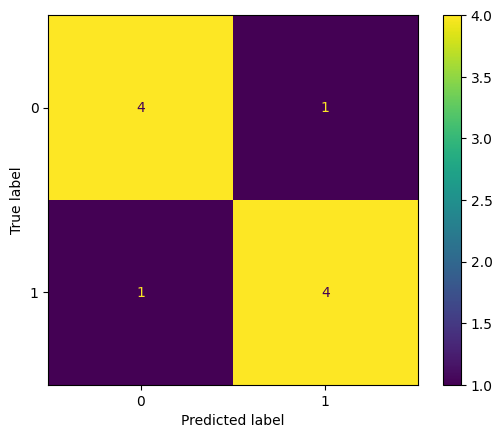

In [115]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [116]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=['LE Fundus', 'RE Fundus']))


              precision    recall  f1-score   support

   LE Fundus       0.80      0.80      0.80         5
   RE Fundus       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



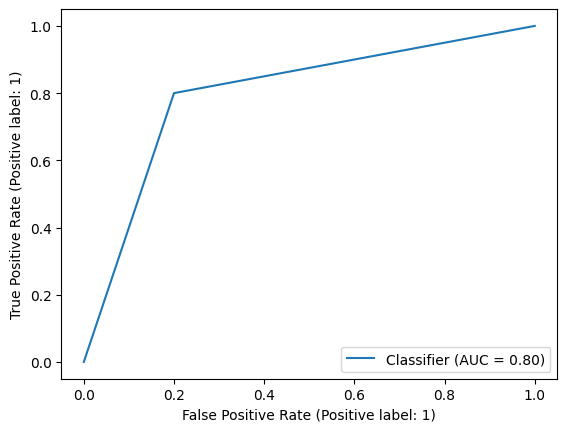

In [117]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

In [123]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/binary_model.keras') # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] < 0.5:
        return "left eye fundus"  # Example class names, modify as per your binary classes
    else:
        return "right eye fundus"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Nornal internet findus photos/LE fundus/1ffa962a-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 128ms/step
Prediction: left eye fundus


In [125]:
unknown_image_path = "/content/drive/MyDrive/Nornal internet findus photos/RE fundus/1ffa9634-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

1/1 [==============================] - 0s 34ms/step
Prediction: right eye fundus
